In [6]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [7]:
# Load the dataset
heart_disease = fetch_ucirepo(id=45)

## Handling missing Variables

In [11]:
X = heart_disease.data.features
y = heart_disease.data.targets
data = pd.concat([X, y], axis=1)

print("Missing values before handling:\n", data.isnull().sum())

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode())

print("Missing values after handling:\n", data.isnull().sum())

Missing values before handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Missing values after handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Perform data encoding 

In [13]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=data.index)
data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

## Standardize numerical features 

In [14]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.

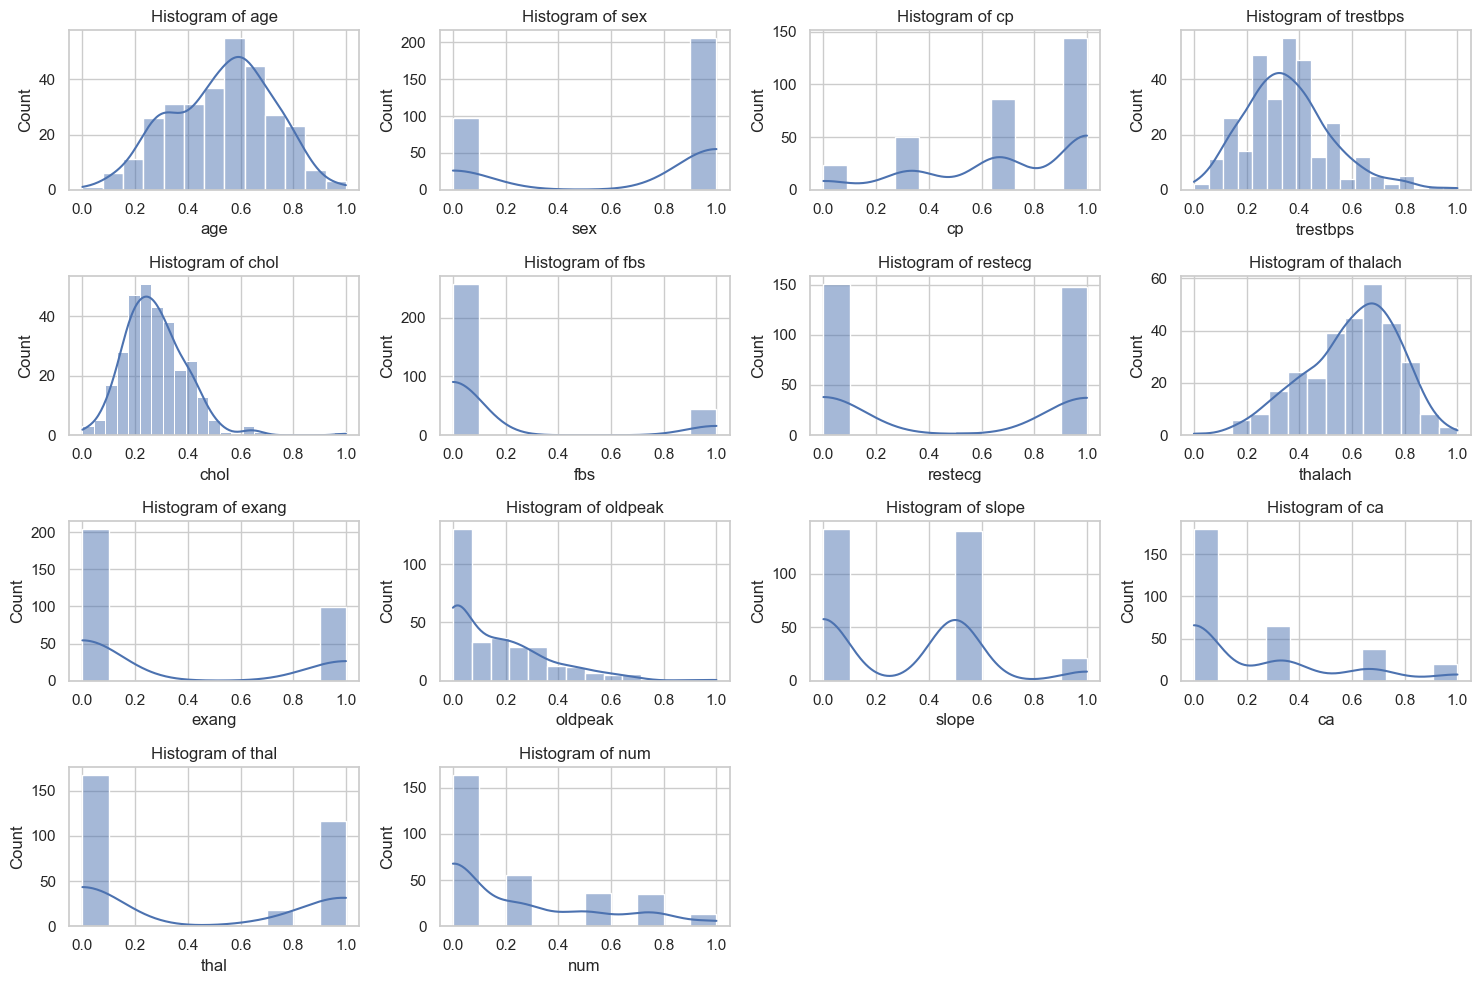

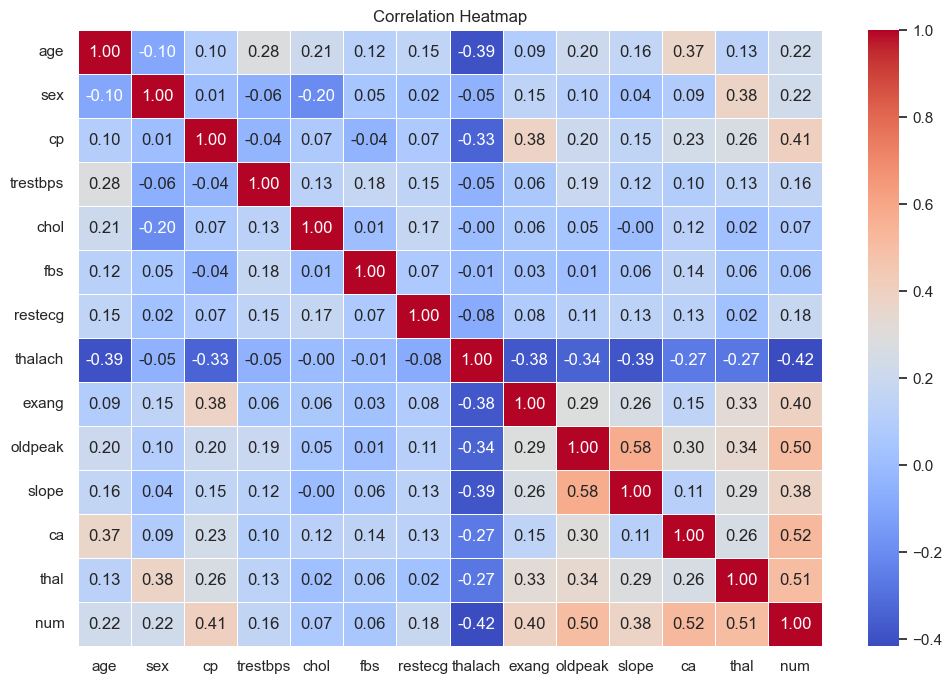

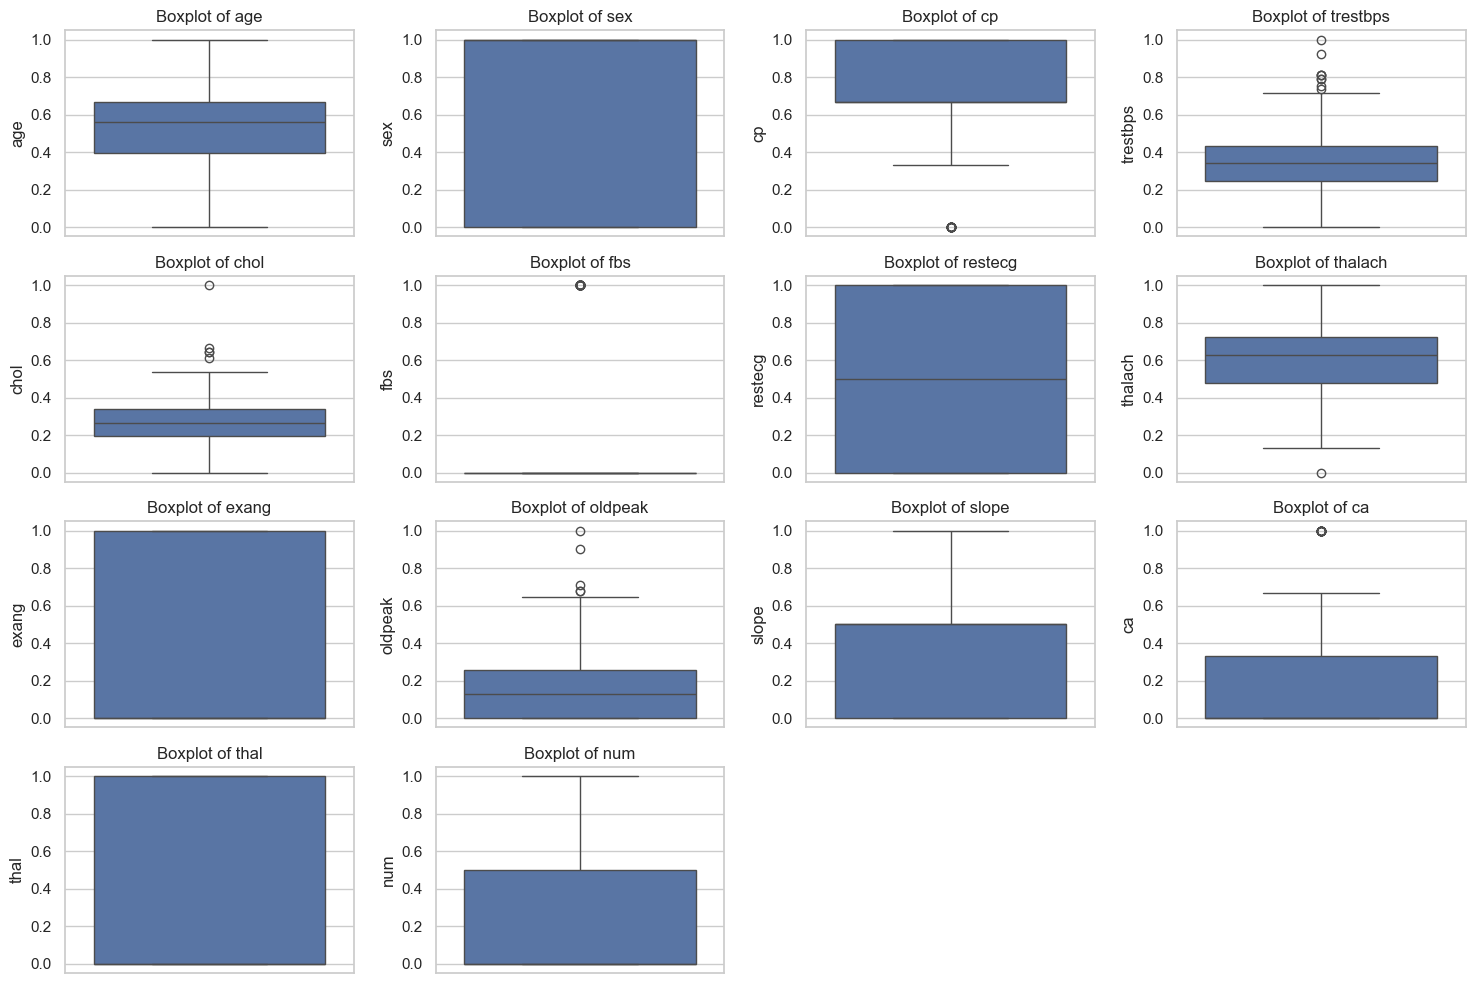

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()